<a href="https://colab.research.google.com/github/lexoz-bedra/image_processing/blob/main/histograms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png

--2023-03-06 09:49:24--  https://stepik.org/media/attachments/lesson/58402/tiger-low-contrast.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 258366 (252K) [image/png]
Saving to: ‘tiger-low-contrast.png’

tiger-low-contrast. 100%[===================>] 252.31K   453KB/s    in 0.6s    

2023-03-06 09:49:25 (453 KB/s) - ‘tiger-low-contrast.png’ saved [258366/258366]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/60609/tiger-color.png

--2023-03-06 11:32:41--  https://stepik.org/media/attachments/lesson/60609/tiger-color.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 956584 (934K) [image/png]
Saving to: ‘tiger-color.png’

tiger-color.png     100%[===================>] 934.16K  1.09MB/s    in 0.8s    

2023-03-06 11:32:42 (1.09 MB/s) - ‘tiger-color.png’ saved [956584/956584]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png

--2023-03-06 12:47:45--  https://stepik.org/media/attachments/lesson/60609/tiger-stable-contrast.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 990877 (968K) [image/png]
Saving to: ‘tiger-stable-contrast.png’

tiger-stable-contra 100%[===================>] 967.65K  1.13MB/s    in 0.8s    

2023-03-06 12:47:46 (1.13 MB/s) - ‘tiger-stable-contrast.png’ saved [990877/990877]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/60610/railroad.png

--2023-03-06 13:19:08--  https://stepik.org/media/attachments/lesson/60610/railroad.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1212114 (1.2M) [image/png]
Saving to: ‘railroad.png’

railroad.png        100%[===================>]   1.16M  1.38MB/s    in 0.8s    

2023-03-06 13:19:10 (1.38 MB/s) - ‘railroad.png’ saved [1212114/1212114]



In [ ]:
!wget https://stepik.org/media/attachments/lesson/60611/landscape.png

--2023-03-06 13:55:34--  https://stepik.org/media/attachments/lesson/60611/landscape.png
Resolving stepik.org (stepik.org)... 185.206.166.110
Connecting to stepik.org (stepik.org)|185.206.166.110|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 308274 (301K) [image/png]
Saving to: ‘landscape.png’

landscape.png       100%[===================>] 301.05K   541KB/s    in 0.6s    

2023-03-06 13:55:35 (541 KB/s) - ‘landscape.png’ saved [308274/308274]



230 128


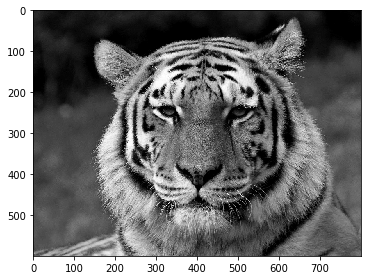

In [ ]:
from skimage.io import imread, imshow
import numpy as np

img = imread('tiger-low-contrast.png')
max_val = np.amax(img)
min_val = np.amin(img)
print(max_val, min_val)

img_modified = ((img - min_val) * (255 / (max_val - min_val))).astype('uint8')
imshow(img_modified)

In [ ]:
from skimage.io import imread
import numpy as np

img = imread('img.png')
values = np.ravel(img)
values.sort()
k = round(0.05 * len(values))
print(values[k], values[-k])

[144 141 141 ... 174 175 174]
129 208


129.0 208.0


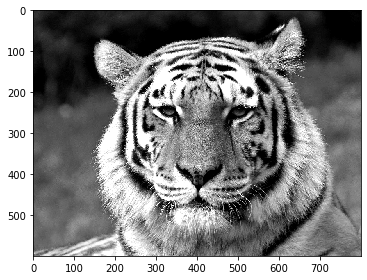

In [ ]:
from skimage.io import imread, imsave
import numpy as np

img = imread('img.png').astype('float')
values = np.ravel(img)
val_sorted = sorted(values)
k = round(0.05 * len(val_sorted))

max_val = val_sorted[-k]
min_val = val_sorted[k]

img_modified = ((img - min_val) * (255 / (max_val - min_val)))
img_modified = np.clip(img_modified, 0, 255).astype('uint8')
imsave('out_img.png', img_modified)

In [ ]:
from skimage.io import imread, imshow, imsave, show
from skimage import img_as_float, img_as_ubyte
import numpy as np

img = imread('tiger-color.png')
img = img_as_float(img)

# RGB to YUV
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]
Y = 0.2126 * R + 0.7152 * G + 0.0722 * B
U = -0.0999 * R - 0.3360 * G + 0.4360 * B
V = 0.6150 * R - 0.5586 * G - 0.0563 * B

# modifying Y
values = np.ravel(Y)
val_sorted = sorted(values)
k = round(0.05 * len(val_sorted))

max_val = val_sorted[-k]
min_val = val_sorted[k]
Y_m = ((Y - min_val) / (max_val - min_val))
#print(Y_m)
Y_m = np.clip(Y_m, 0, 1)
#print(Y_m)
# YUV to RGB
R = Y_m + 1.2803 * V
G = Y_m - 0.2148 * U - 0.3805 * V
B = Y_m + 2.1279 * U

img_modified = img_as_ubyte(np.clip(np.dstack((R, G, B)), 0, 1))
imsave('out_img.png', img_modified)
#imshow(img_modified); show()

[[0.19674727 0.15264956 0.14905884 ... 0.         0.         0.        ]
 [0.1716444  0.17666497 0.18886095 ... 0.         0.         0.        ]
 [0.17128191 0.16196574 0.13508458 ... 0.         0.         0.        ]
 ...
 [0.53908216 0.46918271 0.49251934 ... 0.61578649 0.5756219  0.51035443]
 [0.46055134 0.47990867 0.47559298 ... 0.5311617  0.54549845 0.5756219 ]
 [0.46807517 0.49997088 0.47625168 ... 0.56128515 0.57634687 0.56558075]]
True


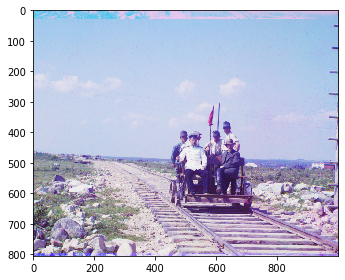

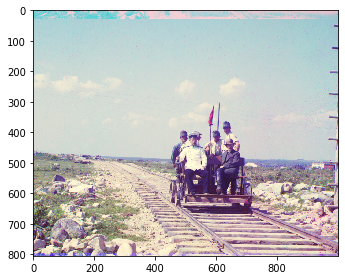

(<matplotlib.image.AxesImage at 0x7f0af8b11760>, None)

In [ ]:
from skimage.io import imread, imshow, imsave, show
from skimage import img_as_float, img_as_ubyte
import numpy as np

img = imread('railroad.png')
#imshow(img); show()
img = img_as_float(img)
R = img[:, :, 0]
G = img[:, :, 1]
B = img[:, :, 2]

R_avg = np.sum(R) / R.size
G_avg = np.sum(G) / G.size
B_avg = np.sum(B) / B.size

avg = (R_avg + G_avg + B_avg) / 3

R_w = R_avg / avg
G_w = G_avg / avg
B_w = B_avg / avg

R /= R_w
G /= G_w
B /= B_w

R = np.clip(R, 0, 1)
G = np.clip(G, 0, 1)
B = np.clip(B, 0, 1)

out_img = img_as_ubyte(np.dstack((R, G, B)))
#imshow(out_img), show()

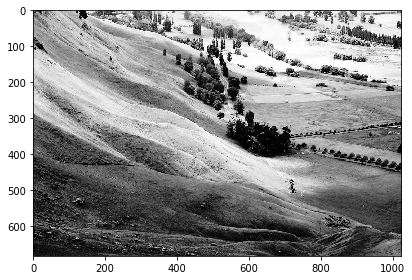

In [ ]:
from skimage.io import imread, imshow, imsave, show
import numpy as np

img = imread('landscape.png')
values, _ = np.histogram(img, bins=range(257))
cdf = [sum(values[:i + 1]) for i in range(256)]
min_val = [x for x in cdf if x > 0][0]
for i, row in enumerate(img):
  for j, px in enumerate(row):
    img[i][j] = round((cdf[px] - min_val) / (img.size - 1) * 255)
img_modified = np.clip(img, 0, 255)
imshow(np.clip(img, 0, 255))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 12, 19, 49, 93, 220, 488, 1061, 1747, 2160, 2718, 3259, 4039, 5108, 6395, 8463, 10610, 13530, 16115, 19125, 22186, 25696, 28701, 28324, 25759, 24369, 23578, 21775, 20385, 19839, 19781, 19445, 18856, 18457, 17906, 17917, 17806, 18485, 17680, 15799, 14163, 12812, 11576, 10751, 9899, 9380, 8863, 8399, 7404, 6403, 5911, 5591, 5150, 4610, 4320, 3860, 3616, 3430, 3063, 2649, 2213, 2046, 1859, 1692, 1484, 1362, 1290, 1153, 1232, 1300, 1520, 1384, 1527, 1735, 1851, 1532, 1359, 1414, 1483, 1541, 1595, 2369, 2810, 1143, 420, 128, 56, 41, 18, 10, 10, 6, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

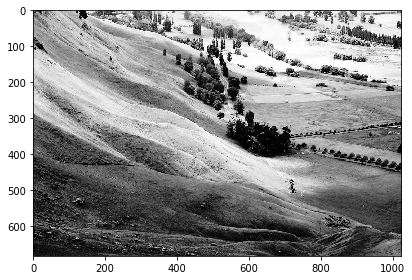

In [ ]:
from skimage.io import imread, imsave
from numpy import clip

img = imread('landscape.png')
n, m = img.shape

h = [0] * 256
for i in range(n):
    for j in range(m):
        h[img[i][j]] += 1

print(h)

cdf = [sum(h[:i + 1]) for i in range(256)]
cdf_min = [x for x in cdf if x > 0][0]

for i in range(n):
    for j in range(m):
        img[i][j] = round((cdf[img[i][j]] - cdf_min) / (n * m - 1) * 255)

img = clip(img, 0, 255)

imsave('out_img.png', img)
imshow(img)
print(np.array_equal(img_modified, img))